# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Integrantes:

    ### Douglas Lima 2016003123
    ### Thomas Ribeiro 20180039733


## Python 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3r886qnv because the default path (/home/thomas/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Global

Estudo da situação covid no âmbito global

In [3]:
covid19_data = pd.read_csv("datasets/CoronaDataset/covid_19_data.csv")
covid19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
paises_top5_confirmados = list(covid19_data.groupby(["Country/Region"]).sum().sort_values(by="Confirmed", ascending=False).head(5).index)

US
Média: 14156.003156361281
Mediana: 0.0
Desvio padrão: 153751.99411840737



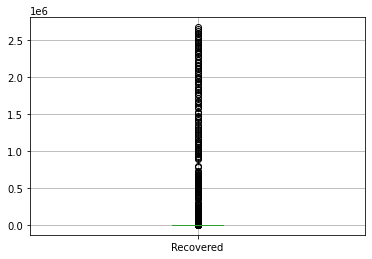

Brazil
Média: 65130.45768468724
Mediana: 37034.0
Desvio padrão: 92078.32052127658



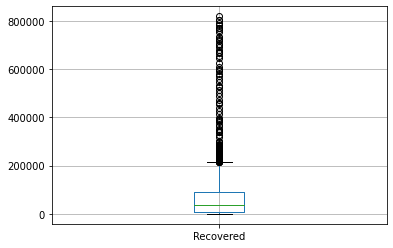

India
Média: 43237.82875686471
Mediana: 5987.0
Desvio padrão: 96002.9934231419



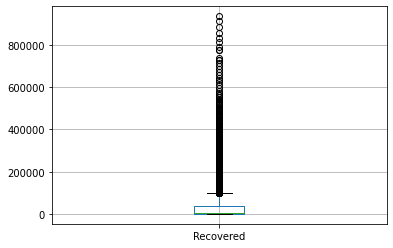

Russia
Média: 7262.347160442743
Mediana: 3679.0
Desvio padrão: 20447.25039230103



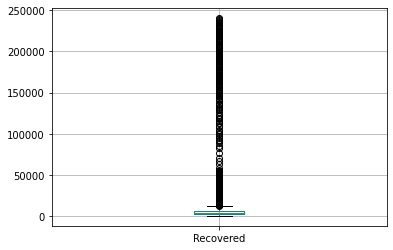

Peru
Média: 11306.669499527856
Mediana: 0.0
Desvio padrão: 63979.01517122482



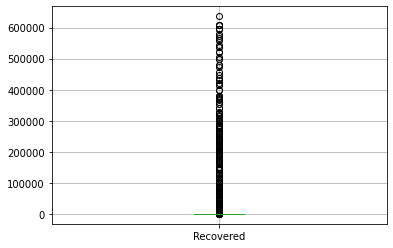

In [5]:

for pais in paises_top5_confirmados:
    print(pais)
    covid19_data_pais = covid19_data.loc[covid19_data['Country/Region'] == pais]
    print("Média:", np.mean(covid19_data_pais["Recovered"]))
    print("Mediana:", np.nanmedian(covid19_data_pais["Recovered"]))
    print("Desvio padrão:", np.std(covid19_data_pais["Recovered"]), end = "\n\n")
    plt.show(covid19_data_pais.boxplot(column=["Recovered"]))

In [6]:
paises_top5_mortos = list(covid19_data.groupby(["Country/Region"]).sum().sort_values(by="Deaths", ascending=False).head(5).index)
paises_top5_mortos

['US', 'Brazil', 'UK', 'Italy', 'Mexico']

## Brasil

Estudo da situação covid no âmbito brasileiro

### Dados que serão utilizados

In [25]:
covid19_data_br = pd.read_csv("datasets/CoronaBrazil/brazil_covid19_cities.csv")
br_population = pd.read_csv("datasets/CoronaBrazil/brazil_population_2019.csv")

dic_sigla_estado = {
"AC" : "Acre", "AL" : "Alagoas", "AP" : "Amapá", "AM" : "Amazonas", "BA" : "Bahia", "CE" : "Ceará", "ES" : "Espírito Santo", "GO" : "Goiás", "MA" : "Maranhão", "MT" : "Mato Grosso", "MS" : "Mato Grosso do Sul", "MG" : "Minas Gerais", "PA" : "Pará", "PB" : "Paraíba", "PR" : "Paraná", "PE" : "Pernambuco", "PI" : "Piauí", "RJ" : "Rio de Janeiro", "RN" : "Rio Grande do Norte", "RS" : "Rio Grande do Sul", "RO" : "Rondônia", "RR" : "Roraima", "SC" : "Santa Catarina", "SP" : "São Paulo", "SE" : "Sergipe", "TO" : "Tocantins", "DF" : "Distrito Federal"
}
dic_estado_sigla = dict([(value, key) for key, value in dic_sigla_estado.items()]) 

{'Acre': 'AC',
 'Alagoas': 'AL',
 'Amapá': 'AP',
 'Amazonas': 'AM',
 'Bahia': 'BA',
 'Ceará': 'CE',
 'Espírito Santo': 'ES',
 'Goiás': 'GO',
 'Maranhão': 'MA',
 'Mato Grosso': 'MT',
 'Mato Grosso do Sul': 'MS',
 'Minas Gerais': 'MG',
 'Pará': 'PA',
 'Paraíba': 'PB',
 'Paraná': 'PR',
 'Pernambuco': 'PE',
 'Piauí': 'PI',
 'Rio de Janeiro': 'RJ',
 'Rio Grande do Norte': 'RN',
 'Rio Grande do Sul': 'RS',
 'Rondônia': 'RO',
 'Roraima': 'RR',
 'Santa Catarina': 'SC',
 'São Paulo': 'SP',
 'Sergipe': 'SE',
 'Tocantins': 'TO',
 'Distrito Federal': 'DF'}

### Somando as ocorrências por estado

In [ ]:
covid19_data_br